/tmp/ipykernel_140502/839276530.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'])


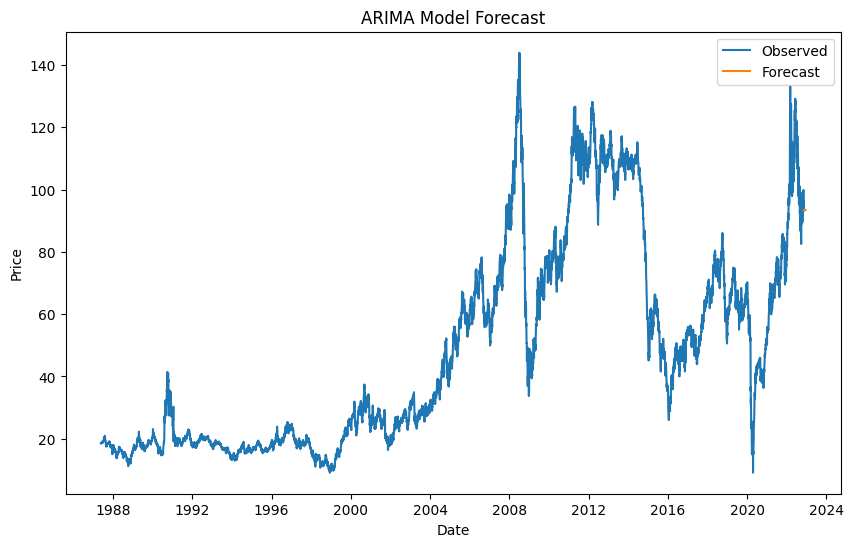

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load processed data
data = pd.read_csv('../Inputs/data/processed_data/cleaned_brent_prices_data.csv')
data['Date']=pd.to_datetime(data['Date'])

# Fit ARIMA model
model = ARIMA(data['Price'], order=(5, 1, 0))
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Observed')
plt.plot(pd.date_range(data['Date'].iloc[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save results
forecast.to_csv('../Results/arima/forecast.csv', index=False)


/tmp/ipykernel_140502/3967474882.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has b

Printing predicitons
 9011    93.392185
9012    93.470938
9013    93.536262
9014    93.477045
9015    93.476757
9016    93.479749
9017    93.481342
9018    93.479974
9019    93.480029
9020    93.480111
Name: predicted_mean, dtype: float64


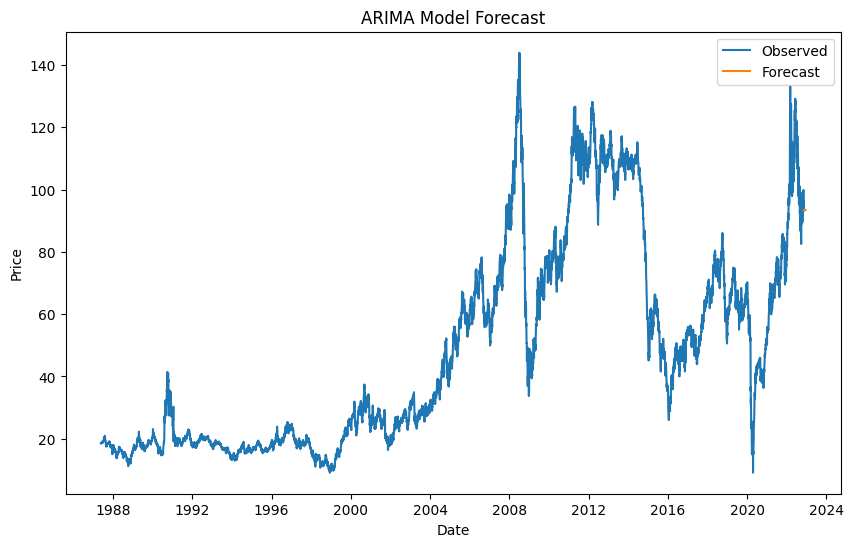

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your time series data
time_series_data = pd.read_csv('../Inputs/data/processed_data/cleaned_brent_prices_data.csv')
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(time_series_data['Price'], order=(5, 1, 0))  # (p,d,q)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=10)
print("Printing predicitons\n",predictions)
# plot results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Observed')
plt.plot(pd.date_range(data['Date'].iloc[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



/tmp/ipykernel_140502/40268689.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index i

9011    93.490459
9012    93.708481
9013    93.882993
9014    93.818111
9015    93.815732
9016    94.181514
9017    94.103310
9018    93.942303
9019    93.721431
9020    93.922091
Name: predicted_mean, dtype: float64


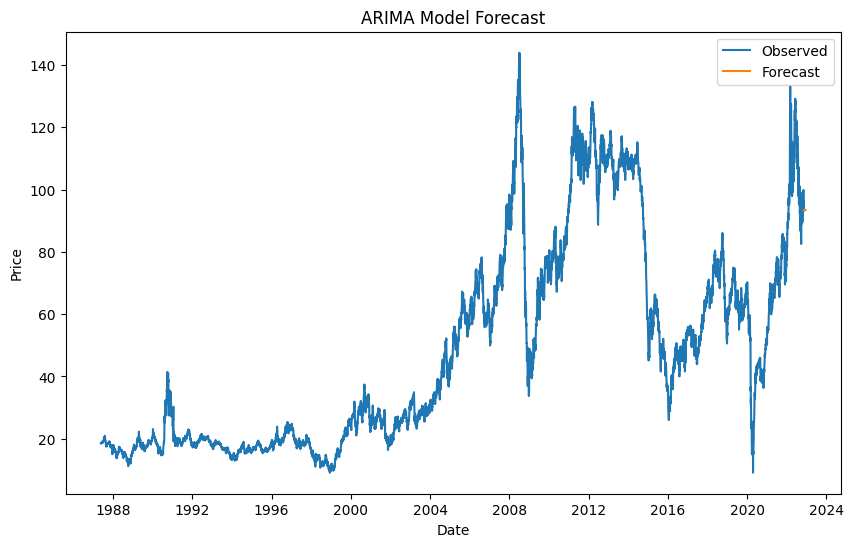

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your time series data
time_series_data = pd.read_csv('../Inputs/data/processed_data/cleaned_brent_prices_data.csv')
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)

# Fit SARIMA model
model = SARIMAX(time_series_data['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # (p,d,q) (P,D,Q,s)
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=10)
print(predictions)


# plot results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Observed')
plt.plot(pd.date_range(data['Date'].iloc[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
